# Практическое занятие №1

П.Н. Советов, РТУ МИРЭА

## Часть 1

Выясните, есть ли ограничения в Питоне для вычислений с целыми числами.
А что насчет чисел с плавающих запятой? Какое максимальное значение вы сумели получить до переполнения?

In [ ]:
import sys

print(sys.float_info.max)
print(sys.maxsize)

1.7976931348623157e+308
9223372036854775807


<a id="mul"></a>
Представим, что в Питоне отсутствует операция умножения. Ее можно заменить сложением. Если мы хотим умножить какое-то число x на 12, то нам понадобится 11 сложений, правильно? Но можно обойтись меньшим числом сложений.

Попробуйте составить код для решения следующих задач. Из арифметических операций можно использовать только явно указанные и в указанном количестве. Входным аргументом является переменная x. Унарный минус использовать нельзя.

1. Умножение на 12. 4 сложения.
1. Умножение на 16. 4 сложения.
1. Умножение на 15. 3 сложения и 2 вычитания.
1. Умножение на 29. 6 сложений и одно вычитание.

Эти задачи имеют практическое применение в области низкоуровневой оптимизации кода. Даже сегодня существуют процессоры без встроенного блока умножения.

In [ ]:
def mul_12(x):
    mul_2 = x + x          # 2 * x
    mul_4 = mul_2 + mul_2  # 4 * x
    mul_8 = mul_4 + mul_4  # 8 * x
    return mul_8 + mul_4


def mul_16(x):
    mul_2 = x + x          # 2 * x
    mul_4 = mul_2 + mul_2  # 4 * x
    mul_8 = mul_4 + mul_4  # 8 * x
    return mul_8 + mul_8


def mul_15(x):
    mul_2 = x + x          # 2 * x
    mul_4 = mul_2 + mul_2  # 4 * x
    mul_8 = mul_4 + mul_4  # 8 * x
    return mul_8 - (0 - mul_8) - x


def mul_29(x):
    mul_2 = x + x          # 2 * x
    mul_4 = mul_2 + mul_2  # 4 * x
    mul_8 = mul_4 + mul_4  # 8 * x
    mul_16 = mul_8 + mul_8
    return mul_16 + mul_16 - (mul_2 + x)


if __name__ == "__main__":
    print(mul_12(1))
    print(mul_16(1))
    print(mul_15(1))
    print(mul_29(1))

12
16
15
29


В реализации Питона спрятано несколько "пасхальных яиц". С одним из них мы уже сталкивались, это `import this`.
Есть еще одно, как-то связанное с гравитацией. Удастся ли вам его обнаружить? Можете гуглить.

In [ ]:
import antigravity

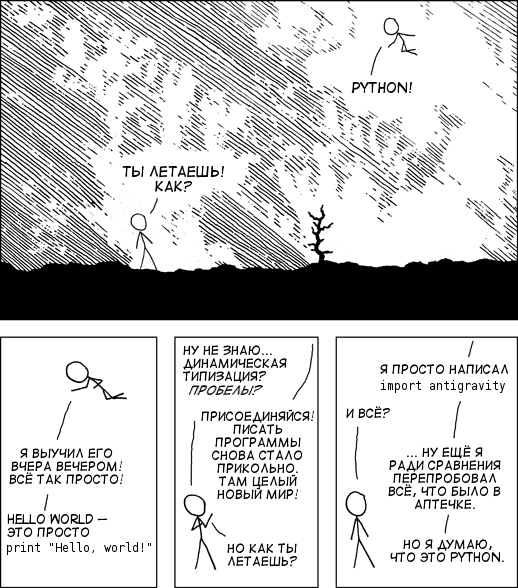

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Рассмотрим следующий код:

In [ ]:
(True * 2 + False) * -True

-2

Что за странное выражение и странный результат?

True эквивалентно 1, False - 0

К сообщениям об ошибках Питона нужно привыкать, в них нет ничего страшного. Давайте специально напишем некорректный код для того, чтобы получить каждое из указанных ниже сообщений об ошибках.

1. SyntaxError: cannot assign to literal


In [ ]:
 1 = 'Один'

SyntaxError: ignored

2. SyntaxError: invalid syntax


In [ ]:
print)

SyntaxError: ignored

3. NameError: name ... is not defined


In [ ]:
print(name)

NameError: ignored

4. TypeError: unsupported operand type(s) for ...

In [ ]:
x = "2"
y = x - 2

TypeError: ignored

5. IndentationError: expected an indented block

In [ ]:
if str_p == str_q:
result = True
  return 0

IndentationError: ignored

6. ZeroDivisionError: division by zero


In [ ]:
print(8/0)

ZeroDivisionError: ignored

7. ValueError: math domain error


In [ ]:
from math import sqrt
sqrt(-1)

ValueError: ignored

8. OverflowError: math range error

In [ ]:
from math import exp
print(exp(100000))

OverflowError: ignored

Рассмотрим следующий код:

In [ ]:
0.6 + 0.3 == 0.9

False

Что здесь произошло? Интерпретатор Питона сломался? Обсудите с преподавателем и [поэкспериментируйте](https://float.exposed/0x44bf9400). 

Двоичная математика с плавающей запятой выглядит так. В большинстве языков программирования он основан на стандарте IEEE 754. Суть проблемы в том, что числа представлены в этом формате целым числом, умноженным на степень двойки; рациональные числа (например, 0,1, что составляет 1/10), знаменатель которых не является степенью двойки, не могут быть точно представлены.

Для 0,1 в стандартном формате binary64 представление можно записать точно так:

0,1000000000000000055511151231257827021181583404541015625 в десятичной системе счисления, 

или

0x1.999999999999ap-4 в шестнадцатеричной нотации C99.

(дополнительно) Дзен Питона определенно нуждается в толковании. Попробуйте найти в интернете что-нибудь на этот счет и давайте обсудим!

Красивое лучше, чем уродливое.

Явное лучше, чем неявное.

Простое лучше, чем сложное.

Сложное лучше, чем запутанное.

Плоское лучше, чем вложенное.

Разреженное лучше, чем плотное.

Читаемость имеет значение.

Особые случаи не настолько особые, чтобы нарушать правила.

При этом практичность важнее безупречности.

Ошибки никогда не должны замалчиваться.

Если они не замалчиваются явно.

Встретив двусмысленность, отбрось искушение угадать.

Должен существовать один и, желательно, только один очевидный способ сделать это.

Хотя он поначалу может быть и не очевиден, если вы не голландец [^1].

Сейчас лучше, чем никогда.

Хотя никогда зачастую лучше, чем прямо сейчас.

Если реализацию сложно объяснить — идея плоха.

Если реализацию легко объяснить — идея, возможно, хороша.

Пространства имён — отличная штука! Будем делать их больше!

## Часть 2

В Питоне можно использовать цепочки операций сравнения, о которых не говорилось на лекции. Рассмотрите следующие примеры и попробуйте объяснить код:

In [ ]:
x = 5
1 < x < 10

True

In [ ]:
x = 5
1 < (x < 10)

False

Некто попытался реализовать "наивную" функцию умножения с помощью сложений. К сожалению, в коде много ошибок. Сможете ли вы их исправить?

In [ ]:
def naive_mul(x,y,res=0):
    for _ in range(y):
        res += x
    return res

def test_naive_mul():
    for x in range(101):
        for y in range(101):
            assert naive_mul(x, y) == x * y
    print("Complete")

print(naive_mul(10, 12))
test_naive_mul()

120
Complete


Добавьте к `naive_mul` автоматическое тестирование для проверки обоих аргументов в диапазоне от 0 до 100. Сравнивайте с встроенным умножением, используя конструкцию `assert`.

Существует старинный метод умножения по методу русского крестьянина. Разобрать его проще на примере.

Предположим, мы хотим перемножить 10 и 15:
    
| 10 | 15  |
|----|-----|
| **5**  | 30  |
| 2  | 60  |
| **1**  | 120 |

В первом столбце последовательно записывают результаты деления на 2 с отбрасыванием остатка. Во втором столбце находятся результаты умножения на 2. Отмечаем нечетные числа в первом столбце. Складываем те числа в правом столбце, которые стоят напротив отмеченных ранее чисел. То есть 30 + 120 = 150. В нашем случае мы не учитывали исходные числа при сложении, но учитывать их, вообще говоря, нужно.

В этом алгоритме используются лишь простейшие операции: умножение на 2, целочисленное деление на 2, проверка на нечетность и сложение. Эти операции соответствуют тем элементарным операциям, которые эффективно выполняет любой процессор. Сам же алгоритм, несмотря на кажущуюся необычность, является вариантом умножения в столбик при использовании двоичного представления чисел:

```
   1111 
   1010 *
   ----
   0000
  1111
 0000
1111
```
Задачи:


1. Реализуйте аналогичную функцию `fast_pow` для возведения в степень (ее легко получить из предыдущего решения).


In [ ]:
def fast_pow(x,y,res=1):
    while y > 0:
        if y == 1:
            return res * x
        elif y % 2 != 0:
            res *= x
        x *= x
        y //= 2
    return res

def test_fast_pow():
    for x in range(101):
        for y in range(101):
            assert fast_pow(x, y) == x**y
    print("Complete")

print(fast_pow(2, 4))
test_fast_pow()

16
Complete


2. Реализуйте функцию `fast_mul` в соответствии с алгоритмом двоичного умножения в столбик. Добавьте автоматическое тестирование, как в случае с `naive_mul`.

In [ ]:
def fast_mul(x, y, res=0):
    if x == 0 or y == 0:
        res = 0
        return res
    elif x == 1:
        res += y
        return res
    elif x % 2 != 0:
        res += y
    return fast_mul(x//2, y*2, res)

def test_fast_mul():
    for x in range(101):
        for y in range(101):
            assert fast_mul(x, y) == x*y
    print("Complete")

print(fast_mul(2, 6))
test_fast_mul()

12
Complete


Скачайте игру [DandyBot](https://github.com/true-grue/DandyBot).
Код для своего игрока записывается в файле user_bot.py. Игра запускается с помощью main.py.

Вот простой пример содержимого user_bot.py:

```Python
def script(check, x, y):
    return 'right'
```

Игровая логика записывается исключительно в теле функции `script`. В нашем случае игрок будет постоянно двигаться вправо.

Полный список действий, которые можно возвращать из функции `script`, задающей "интеллект" игрока:

* `'up'`. Двигаться вверх на клетку.
* `'down'`. Двигаться вниз на клетку.
* `'left'`. Двигаться влево на клетку.
* `'right'`. Двигаться вправо на клетку.
* `'pass'`. Ничего не делать.
* `'take'`. Взять золото.

Для изучения среды есть функция `check`:

* `check('player', x, y)`. `True`, если какой-то игрок в позиции (x, y).
* `check('gold', x , y)`. Если золото в позиции (x, y), то вернуть его количество, иначе вернуть 0.
* `check('wall', x, y)`. `True`, если стена в позиции (x, y).
* `check('empty', x, y)`. `True`, если пусто в позиции (x, y).
* `check('level')`. Вернуть номер текущего уровня. 

Ваша задача — пройти 4 уровня. Дополнительно устанавливаемыми библиотеками и глобальными данными пользоваться нельзя.

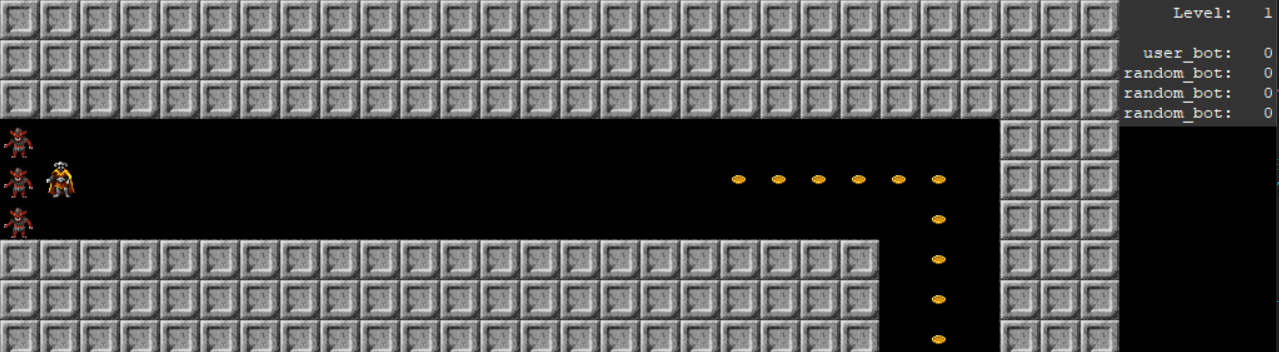

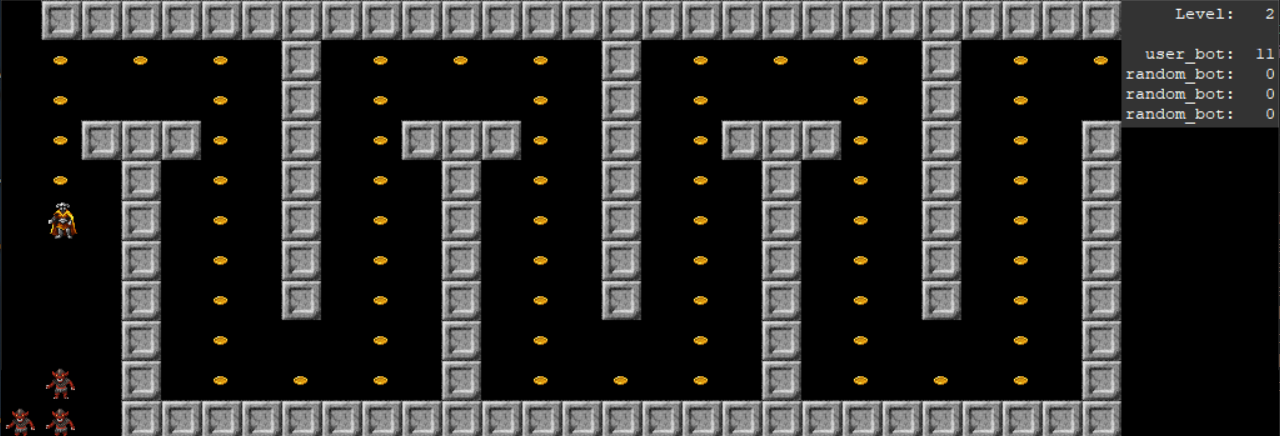

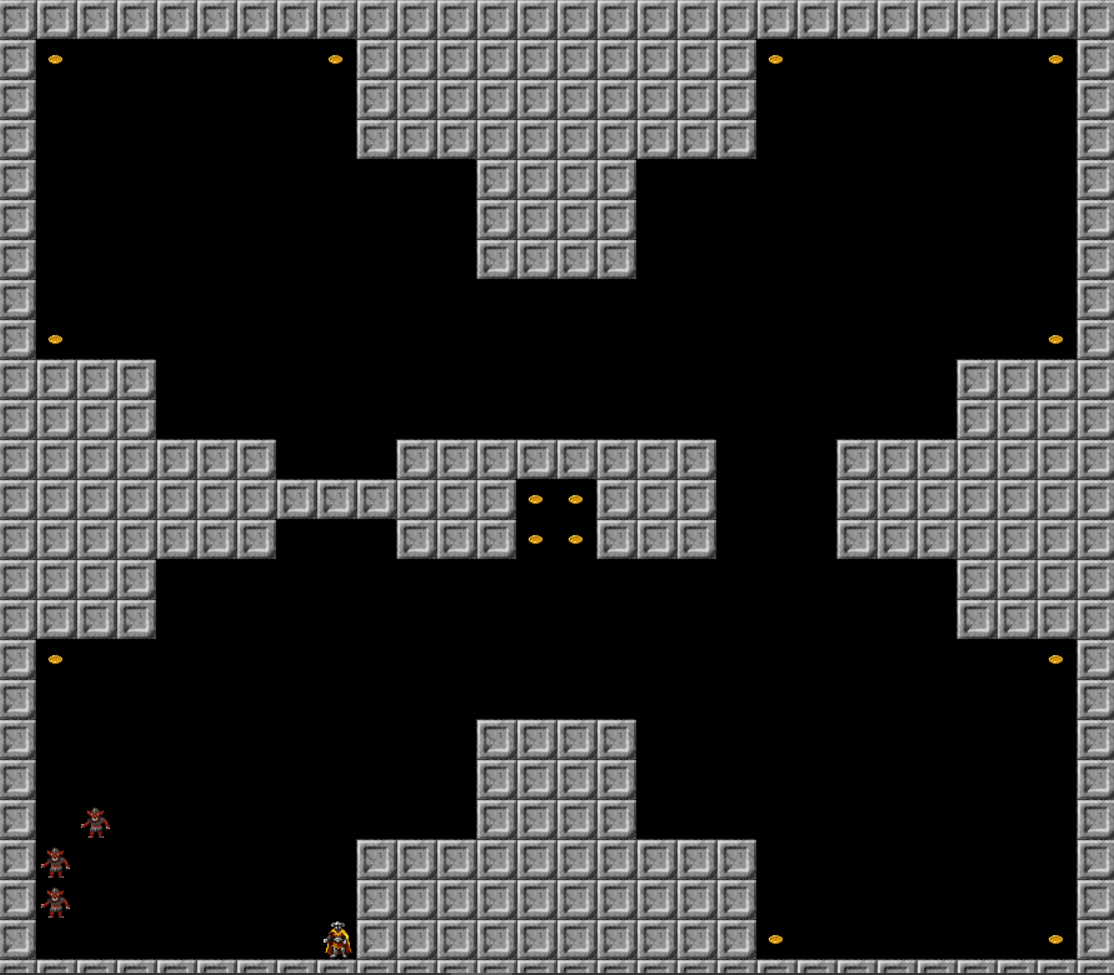

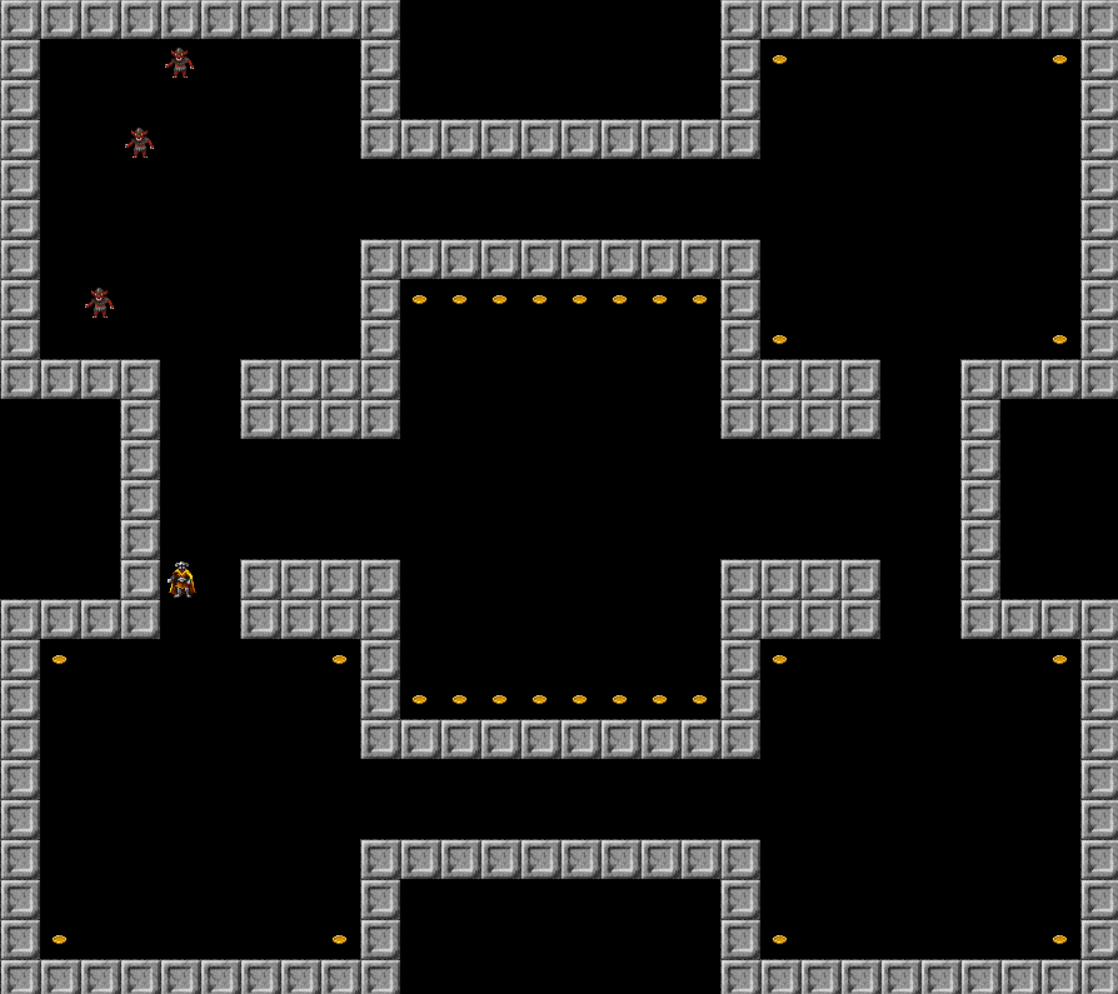

user_bot file

In [ ]:
import random_bot

def script(check, x, y):
    # first level
    if check("level") == 1:
        # Method: go to the right and then down (if we met a wall)
        if check("gold", x, y):
            return "take"
        elif check("wall", x + 2, y): # wall
            return "down"
        return "right"

    # second level
    if check("level") == 2:
        # Method: go forward and then follow the trajectory of gold
        if check("gold", x, y): # Just taking one coin
            return "take"

        if check("gold", x + 1, y): # The coin is on right? - Go there
            return  "right"
        elif check("gold", x - 1, y): # The coin is on left? - Go there
            return  "left"
        
        if check("gold", x, y - 1):
            return  "up"
        elif check("gold", x, y + 1):
            return  "down"

        if not check("wall", x + 2, y):
            return "right"
    
        return "up"

    # third level
    if check("level") == 3:
        wall_above = check("wall", x, y + 1)
        wall_above_right = check("wall", x + 1, y + 1)
        wall_above_left = check("wall", x - 1, y + 1)

        wall_under = check("wall", x, y - 1)
        wall_under_right = check("wall", x + 1, y - 1)
        wall_under_left = check("wall", x - 1, y - 1)

        wall_right = check("wall", x + 1, y)
        wall_left = check("wall", x - 1, y)

        if check("gold", x, y):
            return "take"
        if wall_left and wall_above:
            return "right"
        if wall_right and wall_above:
            return "up"
        if wall_under and wall_right:
            return "left"
        if wall_left and wall_under:
            return "down"
        if wall_above:
            return "right"
        if wall_right:
            return "up"
        if wall_under:
            return "left"
        if wall_left:
            return "down"
        if wall_under_right:
            return "up"
        if wall_above_right:
            return "right"
        if wall_above_left:
            return "down"
        if wall_under_left:
            return "left"
    
    # fourth level
    if check("level") == 4:
        wall_above = check("wall", x, y + 1)
        wall_above_right = check("wall", x + 1, y + 1)
        wall_above_left = check("wall", x - 1, y + 1)

        wall_under = check("wall", x, y - 1)
        wall_under_right = check("wall", x + 1, y - 1)
        wall_under_left = check("wall", x - 1, y - 1)

        wall_right = check("wall", x + 1, y)
        wall_left = check("wall", x - 1, y)

        if check("gold", x, y):
            return "take"
        if check("wall", x, y - 2) and check("wall", x + 1, y - 2) and check("wall", x + 2, y - 2) and check("wall", x, y + 1):
            return "up"
        if check("wall", x - 2, y + 2) and check("wall", x - 1, y + 2) and check("wall", x, y + 2) and check("wall", x, y - 1):
            return "down"
        
        if wall_left and wall_above:
            return "right"
        if wall_right and wall_above:
            return "up"
        if wall_under and wall_right:
            return "left"
        if wall_left and wall_under:
            return "down"
        if wall_above:
            return "right"
        if wall_right:
            return "up"
        if wall_under:
            return "left"
        if wall_left:
            return "down"
        if wall_under_right:
            return "up"
        if wall_above_right:
            return "right"
        if wall_above_left:
            return "down"
        if wall_under_left:
            return "left"
    return "pass"

Ссылка на полный проект: 